# Do not update the first cell (it's related to surface/formation structure)

In [1]:
#### DO NOT UPDATE THIS CELL ########
import matplotlib.pyplot as plt
import numpy as np
from __generate_surface import generate_structure_of_anticline_example
grid = generate_structure_of_anticline_example()


# now you can play with this workflow below

c:\Users\EoJinwoo\AppData\Local\Programs\Python\Python313\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (c:\Users\EoJinwoo\AppData\Local\Programs\Python\Python313\Lib\site-packages\trame\widgets\__init__.py)

Falling back to a static output.
  warnings.warn(


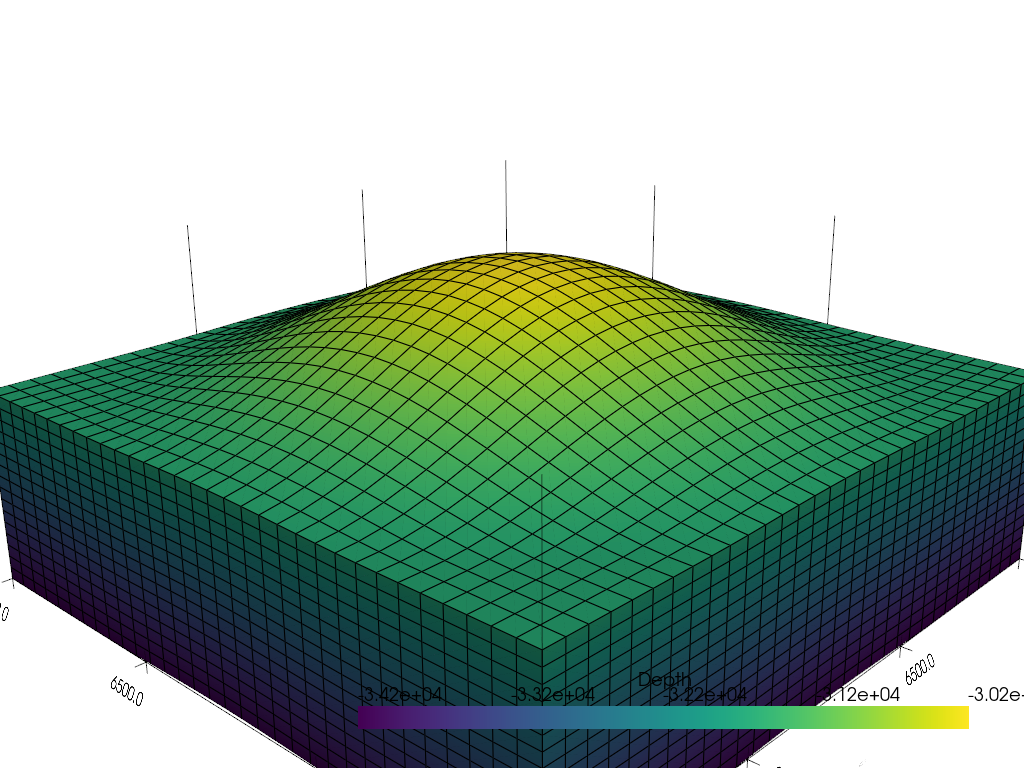

In [2]:
# quick check the structure grid
grid.visual_3D_from_formation_grid('top_to_bottom_formation',vertical_colorbar =False)

In [2]:
grid.cmg_corner_point_generate(top_surface_name='top', bottom_surface_name='bottom' )

In [3]:
grid.write_cmg_corner_points_input_file('.','top_to_bottom_formation')

In [8]:
# load porosity and facies model whose size is 16x32x32 in z-, y-, and x-direction
Facies = np.load('facie_16x32x32.npy')
Porosity = np.load('porosity_16x32x32.npy')

In [9]:
# let's check what are existing formation_grids in "Stratigraphy_Grid"
grid.print_formation_grids()

formation_grids are ...: 
- top_to_bottom_formation


In [10]:
# add properties to the formation grid (resampling is required so it may takes around 15 sec each
grid._add_value_to_grid(formation_name='top_to_bottom_formation',value = Facies,value_name = 'Facies')
grid._add_value_to_grid(formation_name='top_to_bottom_formation',value = Porosity,value_name = 'Porosity')


Facies succesfully added to top_to_bottom_formation
formation_grids[formation_name].keys are ['xx', 'yy', 'zz', 'Facies']
Porosity succesfully added to top_to_bottom_formation
formation_grids[formation_name].keys are ['xx', 'yy', 'zz', 'Facies', 'Porosity']


In [11]:
# visualize Facies
grid.visual_3D_from_formation_grid('top_to_bottom_formation',value_name = 'Facies')

Widget(value="<iframe src='http://localhost:53448/index.html?ui=P_0x1fa90475d90_1&reconnect=auto' style='width…

## Don't forget to double check with the simple plt.imshow of top layer

Text(0, 0.5, 'Northing')

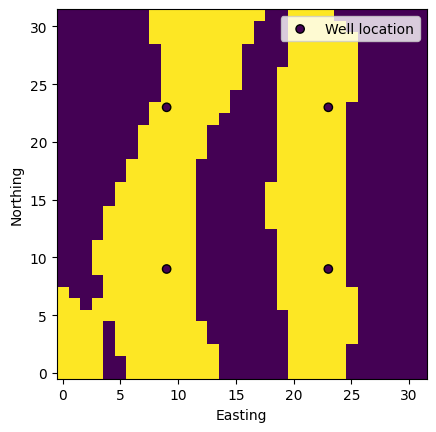

In [12]:
plt.imshow(Facies[0])
plt.gca().invert_yaxis()
plt.scatter([9,9,23,23],[9,23,9,23],c = [0, 0, 0, 0],edgecolors = 'k',marker = 'o', label = 'Well location')
plt.legend()
plt.xlabel('Easting')
plt.ylabel('Northing')